<a href="https://colab.research.google.com/github/KOdin2/Machine-learning/blob/pre-processing/Comparison_of_LDA_and_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LDA and PCA transform**

This notebook allows for the upload of a .csv file, which can then be transformed by LDA or PCA. The data will be split using K-fold cross validion, with K being a user choice.

The difference in accuracy results will be compared


In [ ]:
import numpy as np
from sklearn.model_selection import KFold
import io
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

This cell will allow you to upload .csv files from your computer

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving All colours - Alu.csv to All colours - Alu.csv


In [ ]:
for key in uploaded:

  #loads in the file and save to main_file
  print("File uploaded: " +str(key))
  df = pd.read_csv(io.BytesIO(uploaded[key]))


File uploaded: All colours - Alu.csv


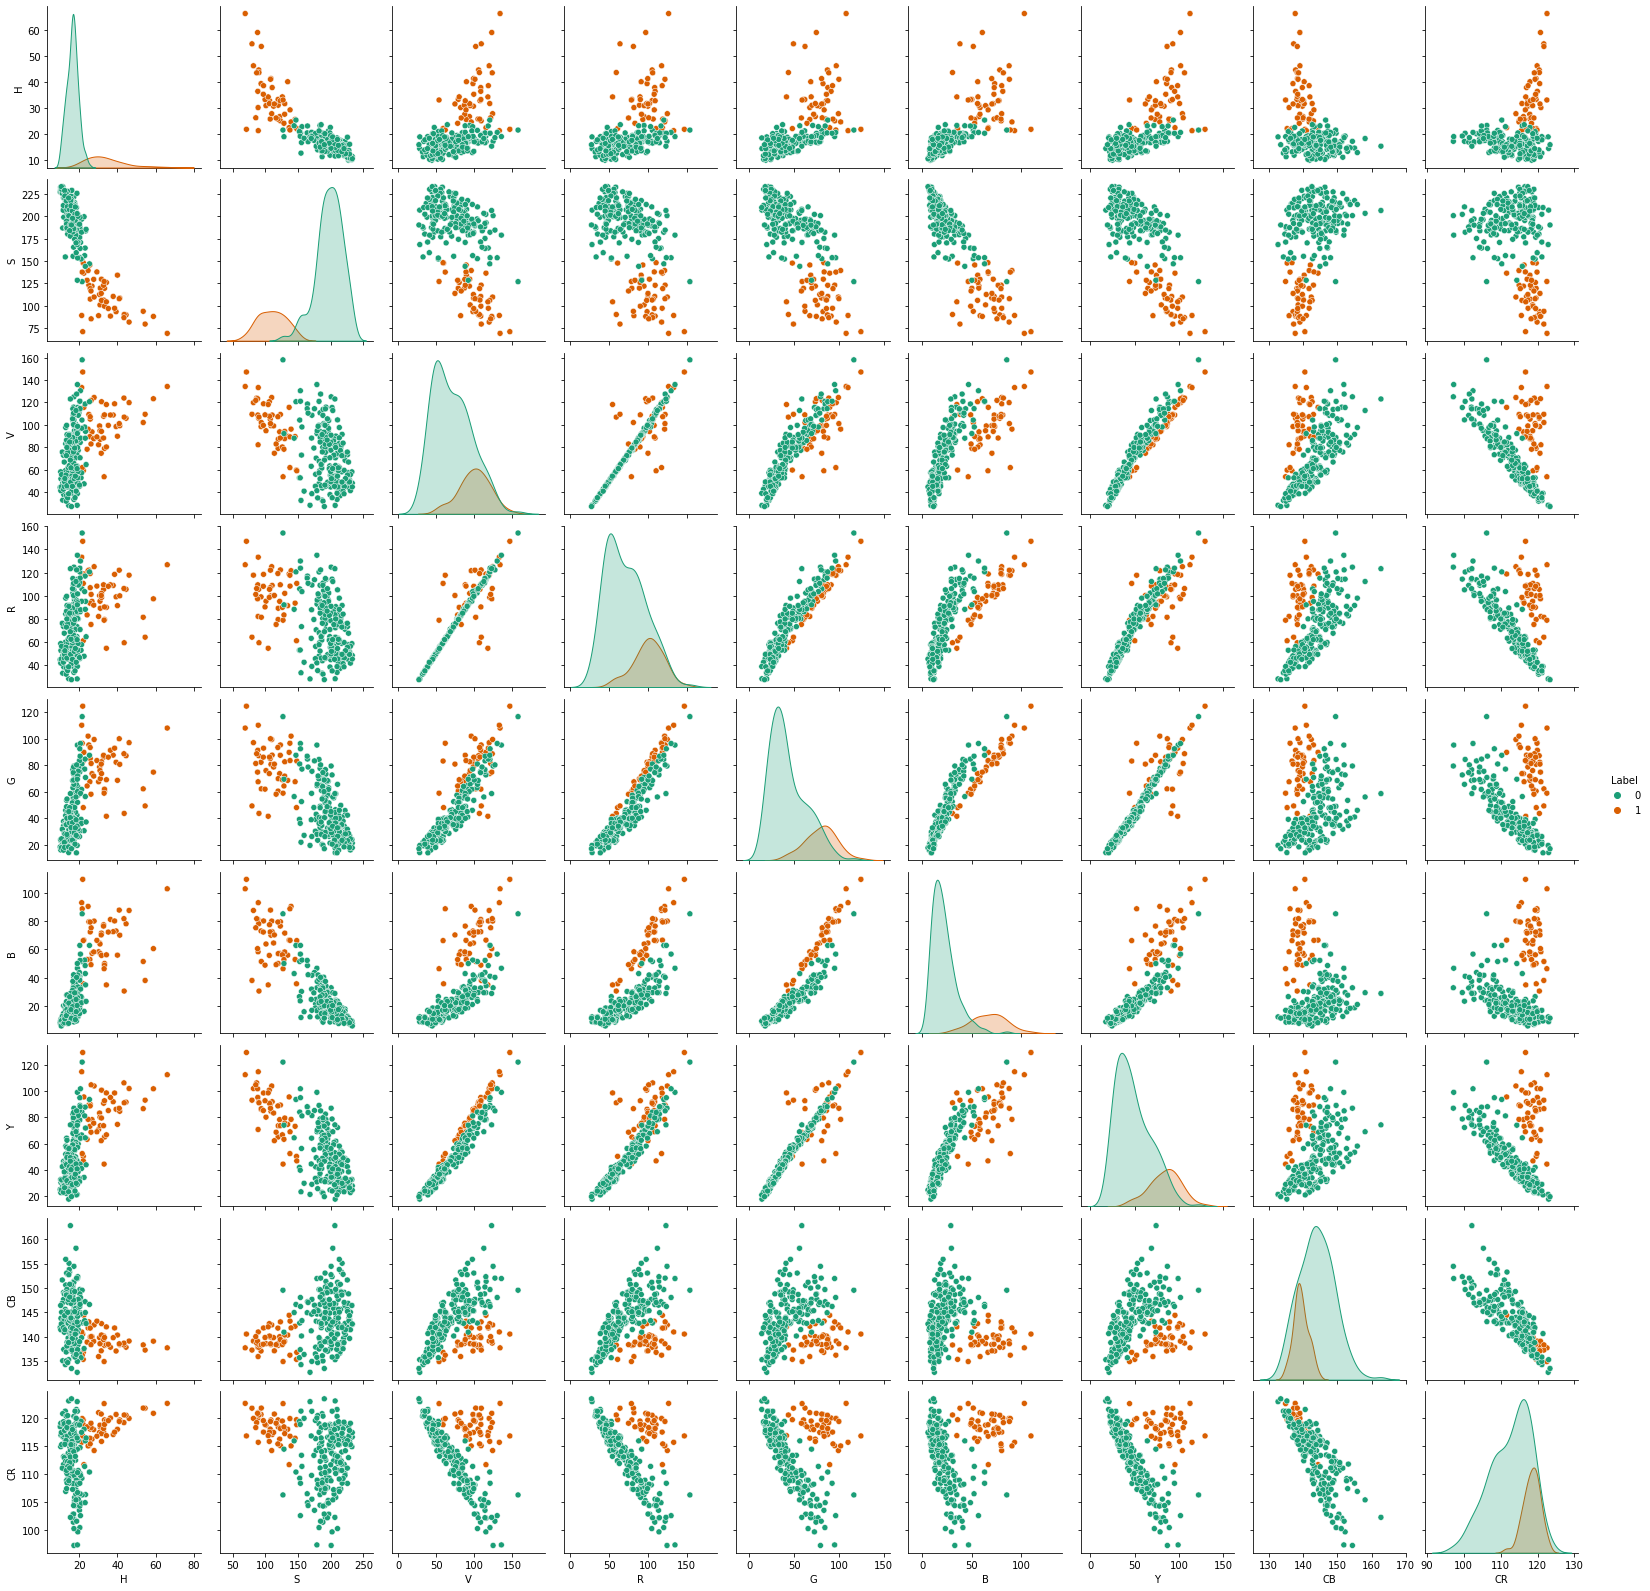

In [ ]:
sns.pairplot(df,hue='Label',palette='Dark2')

In [ ]:
#assign and X and y (data and labels)

X = df[df.columns[1:len(df.columns)]] 
X = X.abs()
y = df.iloc[:,0]

label_dict = {1: 'Metal', 2: 'Not metal'}

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state = 0)

[[22  0]
 [ 0  3]]
[[22  0]
 [ 0  3]]
[[19  3]
 [ 3  0]]


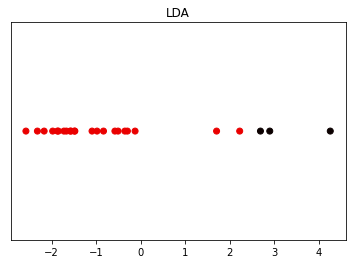

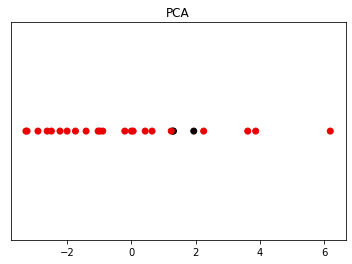

Data accuracy: 1.0 LDA accuracy: 1.0 PCA accuracy: 0.76
[[20  0]
 [ 0  5]]
[[20  0]
 [ 0  5]]
[[20  0]
 [ 3  2]]


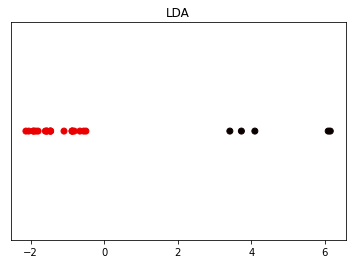

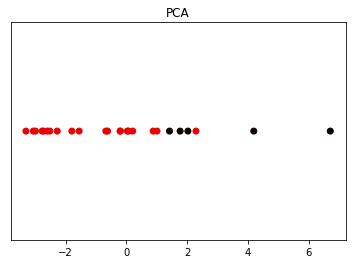

Data accuracy: 1.0 LDA accuracy: 1.0 PCA accuracy: 0.88
[[20  0]
 [ 0  5]]
[[20  0]
 [ 0  5]]
[[20  0]
 [ 1  4]]


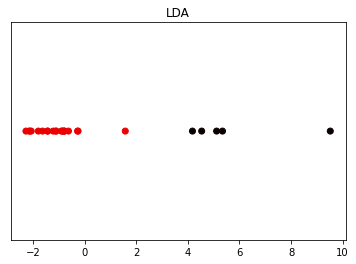

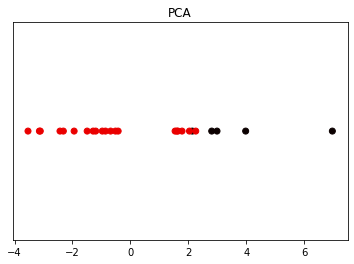

Data accuracy: 1.0 LDA accuracy: 1.0 PCA accuracy: 0.96
[[18  0]
 [ 0  7]]
[[18  0]
 [ 0  7]]
[[18  0]
 [ 2  5]]


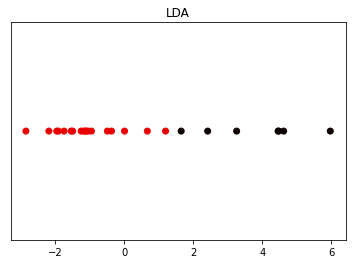

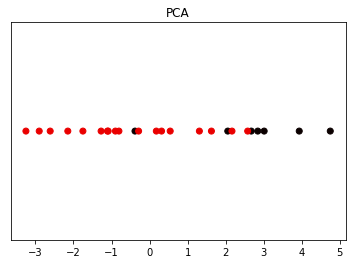

Data accuracy: 1.0 LDA accuracy: 1.0 PCA accuracy: 0.92
[[19  0]
 [ 1  5]]
[[19  0]
 [ 1  5]]
[[19  0]
 [ 1  5]]


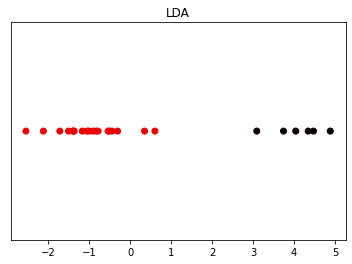

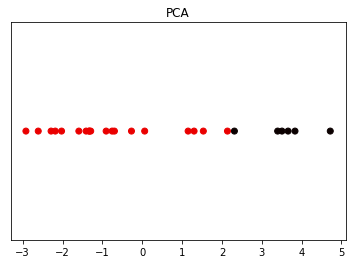

Data accuracy: 1.0 LDA accuracy: 0.96 PCA accuracy: 0.96
[[22  0]
 [ 0  3]]
[[22  0]
 [ 0  3]]
[[20  2]
 [ 2  1]]


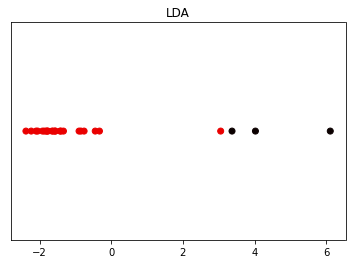

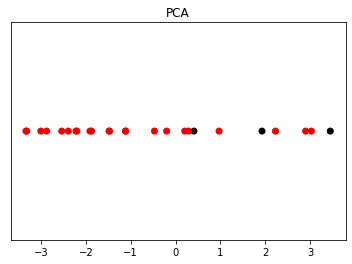

Data accuracy: 1.0 LDA accuracy: 1.0 PCA accuracy: 0.84
[[20  0]
 [ 0  4]]
[[20  0]
 [ 0  4]]
[[17  3]
 [ 1  3]]


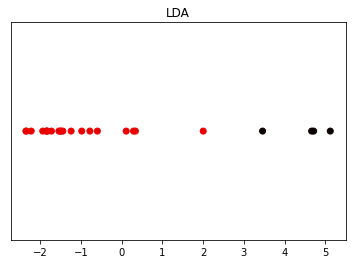

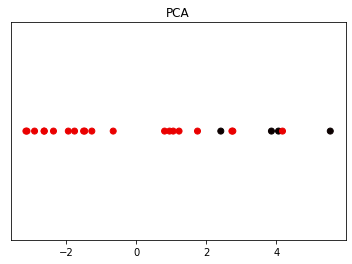

Data accuracy: 1.0 LDA accuracy: 1.0 PCA accuracy: 0.83
[[17  0]
 [ 0  7]]
[[17  0]
 [ 0  7]]
[[15  2]
 [ 3  4]]


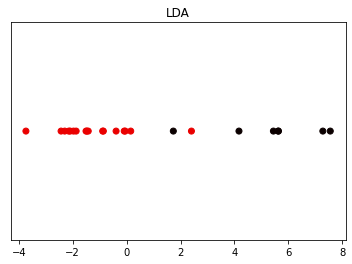

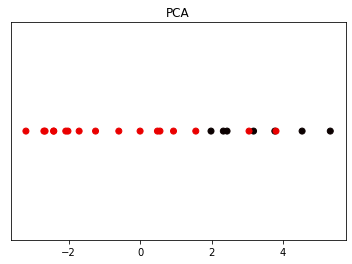

Data accuracy: 1.0 LDA accuracy: 1.0 PCA accuracy: 0.79
[[21  0]
 [ 0  3]]
[[21  0]
 [ 0  3]]
[[20  1]
 [ 1  2]]


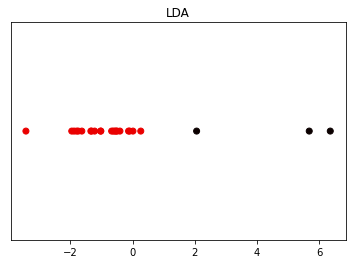

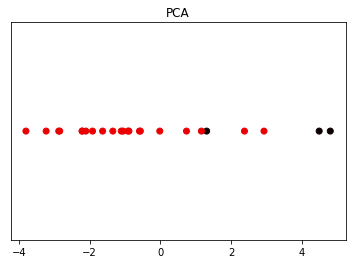

Data accuracy: 1.0 LDA accuracy: 1.0 PCA accuracy: 0.92
[[19  0]
 [ 0  5]]
[[19  0]
 [ 0  5]]
[[19  0]
 [ 0  5]]


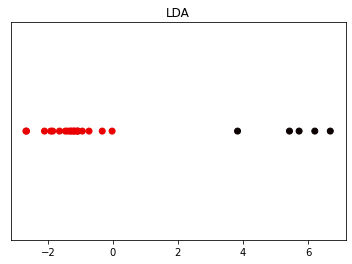

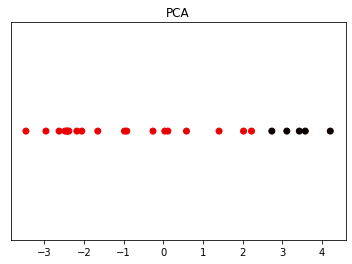

Data accuracy: 1.0 LDA accuracy: 1.0 PCA accuracy: 1.0
Total accurcy of data: 0.9960000000000001
Total accuracy of LDA: 0.9960000000000001
Total accurcy of PCA: 0.8859999999999999


In [ ]:
lda_total_acc = 0
total_acc = 0
pca_total_acc = 0

for train_index, test_index in kf.split(df):

  x_train = X.iloc[train_index]
  x_test = X.iloc[test_index]
  y_train = y[train_index]
  y_test = y[test_index]


  sc = StandardScaler()
  x_train = sc.fit_transform(x_train)
  x_test = sc.transform(x_test)


  #changes LDA form 9 componets to 1
  lda = LDA(n_components=1)
  lda_x_train = lda.fit_transform(x_train, y_train)
  lda_x_test = lda.transform(x_test)


  pca = PCA(n_components=1)
  pca_x_train = pca.fit_transform(x_train, y_train)
  pca_x_test = pca.transform(x_test)



  #classifier = RandomForestClassifier(max_depth=2, random_state=0)
  classifier =SVC(C=1, kernel='linear', random_state=0 )
  classifier.fit(lda_x_train, y_train)
  lda_y_pred = classifier.predict(lda_x_test)

  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x_test)

  classifier.fit(pca_x_train, y_train)
  pca_y_pred = classifier.predict(pca_x_test)


  cm = confusion_matrix(y_test, y_pred)
  print(cm)
  acc = round(accuracy_score(y_test, y_pred),2)
                       
  cm = confusion_matrix(y_test, y_pred)
  print(cm)
  lda_acc = round( accuracy_score(y_test, lda_y_pred),2)

  cm = confusion_matrix(y_test, pca_y_pred)
  print(cm)
  pca_acc = round( accuracy_score(y_test, pca_y_pred),2)

  total_acc     = total_acc     + acc
  lda_total_acc = lda_total_acc + acc
  pca_total_acc = pca_total_acc + pca_acc

  #plots scatter grpahs 
  plt.scatter(lda_x_test, np.zeros_like(lda_x_test), c = y_test, cmap="hot_r", vmin=-2 )
  plt.yticks([])
  plt.title("LDA")
  plt.show()

  plt.scatter(pca_x_test, np.zeros_like(pca_x_test), c = y_test, cmap="hot_r", vmin=-2 )
  plt.yticks([])
  plt.title("PCA")
  plt.show()

  print('Data accuracy: ' + str(nl_acc)+ ' LDA accuracy: ' + str(acc)   +   ' PCA accuracy: ' + str(pca_acc))


print("Total accurcy of data: " + str(round(total_acc/10,2)))
print("Total accuracy of LDA: " + str(round(lda_total_acc/10,2)))
print("Total accurcy of PCA: " + str(round(pca_total_acc/10,2)))